#                                 Data Manipulation with pandas 

# DataSet   Novel Coronavirus (COVID-19) 

# Question No: 1
          Write a Python program to display first 5 rows from COVID-19 dataset.Also print the dataset information and check the missing values.


In [1]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
print(covid_data.head(5))
print("\nDataset information:")
print(covid_data.info())
print("\nMissing data information:")
print(covid_data.isna().sum())

  Province/State Country/Region          Last Update  Confirmed  Deaths  \
0          Hubei          China  2020-03-17T11:53:10      67799    3111   
1            NaN          Italy  2020-03-17T18:33:02      31506    2503   
2            NaN           Iran  2020-03-17T15:13:09      16169     988   
3            NaN          Spain  2020-03-17T20:53:02      11748     533   
4            NaN        Germany  2020-03-17T18:53:02       9257      24   

   Recovered  Latitude  Longitude  
0      56003   30.9756   112.2707  
1       2941   41.8719    12.5674  
2       5389   32.4279    53.6880  
3       1028   40.4637    -3.7492  
4         67   51.1657    10.4515  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  152 non-null    object 
 1   Country/Region  308 non-null    object 
 2   Last Update     308 no

# Question No: 2
             Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.


In [2]:
# First add new column 
covid_data['Active']=covid_data['Confirmed']-covid_data['Deaths']-covid_data['Recovered']
# now solve the question
print(covid_data.pivot_table(values=['Confirmed','Deaths','Recovered','Active'],index='Country/Region',aggfunc=sum).reset_index())

                     Country/Region  Active  Confirmed  Deaths  Recovered
0                       Afghanistan      25         26       0          1
1                           Albania      54         55       1          0
2                           Algeria      44         60       4         12
3                           Andorra      38         39       0          1
4                        Antarctica       0          0       0          0
..                              ...     ...        ...     ...        ...
161                      Uzbekistan      10         10       0          0
162                       Venezuela      33         33       0          0
163                         Vietnam      50         66       0         16
164            Winter Olympics 2022       0          0       0          0
165  occupied Palestinian territory       0          0       0          0

[166 rows x 5 columns]


# Question NO: 3
            Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.

In [3]:
print(covid_data.pivot_table(values=['Confirmed','Deaths','Recovered'],index=['Country/Region','Province/State'],aggfunc=max))

                                             Confirmed  Deaths  Recovered
Country/Region Province/State                                            
Australia      Australian Capital Territory          2       0          0
               From Diamond Princess                 0       0          0
               New South Wales                     210       4          4
               Northern Territory                    1       0          0
               Queensland                           78       0          8
...                                                ...     ...        ...
United Kingdom Jersey                                0       0          0
               Northern Ireland                      0       0          0
               Scotland                              0      11          0
               Unknown                            1950       0         52
               Wales                                 0       5          0

[152 rows x 3 columns]


# Question No: 4
       Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19). 

In [4]:
get_china_data=covid_data[covid_data['Country/Region']=='China']
get_china_data[['Province/State','Country/Region','Confirmed','Deaths','Recovered']].sort_values(by='Confirmed',ascending=False)

,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,Hubei,China,67799,3111,56003
12,Guangdong,China,1364,8,1307
14,Henan,China,1273,22,1250
16,Zhejiang,China,1232,1,1216
19,Hunan,China,1018,4,1014
20,Anhui,China,990,6,984
22,Jiangxi,China,935,1,934
24,Shandong,China,761,7,746
27,Jiangsu,China,631,0,631
28,Chongqing,China,576,6,570


# Question No: 5
      Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19)

In [5]:
data=covid_data.pivot_table(values=['Confirmed','Deaths','Recovered'],index='Country/Region',aggfunc=sum).reset_index()
result=data[data['Deaths']>0][['Country/Region', 'Deaths']]
result

,Country/Region,Deaths
1,Albania,1
2,Algeria,4
6,Argentina,2
9,Australia,5
10,Austria,3
11,Azerbaijan,1
12,Bahrain,1
16,Belgium,10
21,Brazil,1
23,Bulgaria,2


# Question No: 6
         Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered.

In [6]:
data=covid_data.pivot_table(values=['Confirmed','Deaths','Recovered'],index='Country/Region',aggfunc=sum).reset_index()
result=data[data['Recovered']==0][['Country/Region','Confirmed', 'Deaths','Recovered']]
result

,Country/Region,Confirmed,Deaths,Recovered
1,Albania,55,1,0
4,Antarctica,0,0,0
5,Antigua and Barbuda,1,0,0
8,Aruba,3,0,0
14,Barbados,2,0,0
...,...,...,...,...
160,Uruguay,29,0,0
161,Uzbekistan,10,0,0
162,Venezuela,33,0,0
164,Winter Olympics 2022,0,0,0


# Question No: 7
          Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died.

In [7]:
data=covid_data.pivot_table(values=['Confirmed','Deaths','Recovered'],index='Country/Region',aggfunc=sum).reset_index()
result=data[(data['Confirmed']==data['Deaths']) & (data['Confirmed']>0)][['Country/Region','Confirmed','Deaths']].sort_values(by='Confirmed',ascending=False)
result

,Country/Region,Confirmed,Deaths
141,Sudan,1,1


# Question No: 8
        Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [8]:
data=covid_data.pivot_table(values=['Confirmed','Deaths','Recovered'],index='Country/Region',aggfunc=sum).reset_index()
result=data[(data['Confirmed']==data['Recovered']) & (data['Confirmed']>0)][['Country/Region','Confirmed','Recovered']].sort_values(by='Confirmed',ascending=False)
result

,Country/Region,Confirmed,Recovered
105,Nepal,1,1


# Question No: 9
      Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [9]:
data=covid_data.pivot_table(values=['Last Update','Confirmed','Deaths','Recovered'],index='Country/Region',aggfunc=max).reset_index()
result=data.sort_values(by='Confirmed',ascending=False)[:10]
result

,Country/Region,Confirmed,Deaths,Last Update,Recovered
30,China,67799,3111,2020-03-17T12:13:13,56003
74,Italy,31506,2503,2020-03-17T18:33:02,2941
70,Iran,16169,988,2020-03-17T15:13:09,5389
139,Spain,11748,533,2020-03-17T20:53:02,1028
54,Germany,9257,24,2020-03-17T18:53:02,67
83,"Korea, South",8320,81,2020-03-17T10:33:03,1407
50,France,7652,148,2020-03-17T19:13:08,12
145,Switzerland,2700,40,2020-03-17T16:33:04,4
159,United Kingdom,1950,198,2020-03-17T15:13:09,52
156,US,1706,55,2020-03-17T23:53:03,6


# Question No: 10
       Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 50.

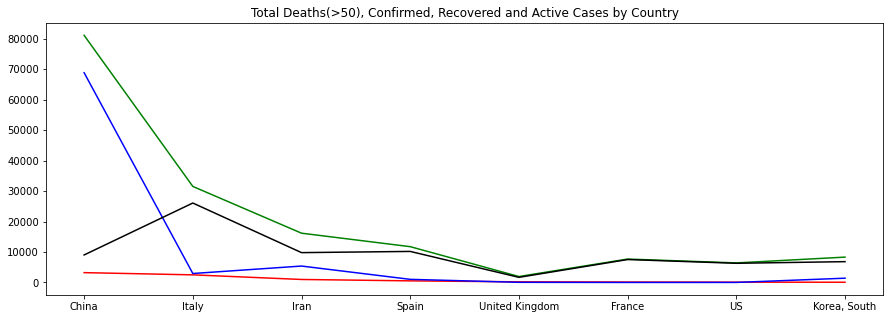

In [10]:
import matplotlib.pyplot as plt
covid_data['Active']=covid_data['Confirmed']-covid_data['Deaths']-covid_data['Recovered']
data=covid_data.pivot_table(values=['Confirmed','Deaths','Recovered','Active'],index='Country/Region',aggfunc=sum).reset_index()
death_data=data[data['Deaths']>50].sort_values(by='Deaths',ascending=False)
plt.figure(figsize=(15, 5))
plt.plot(death_data['Country/Region'], death_data['Deaths'],color='red')
plt.plot(death_data['Country/Region'], death_data['Confirmed'],color='green')
plt.plot(death_data['Country/Region'], death_data['Recovered'], color='blue')
plt.plot(death_data['Country/Region'], death_data['Active'], color='black')
plt.title('Total Deaths(>50), Confirmed, Recovered and Active Cases by Country')
plt.show()

# Question No: 11
        Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA.

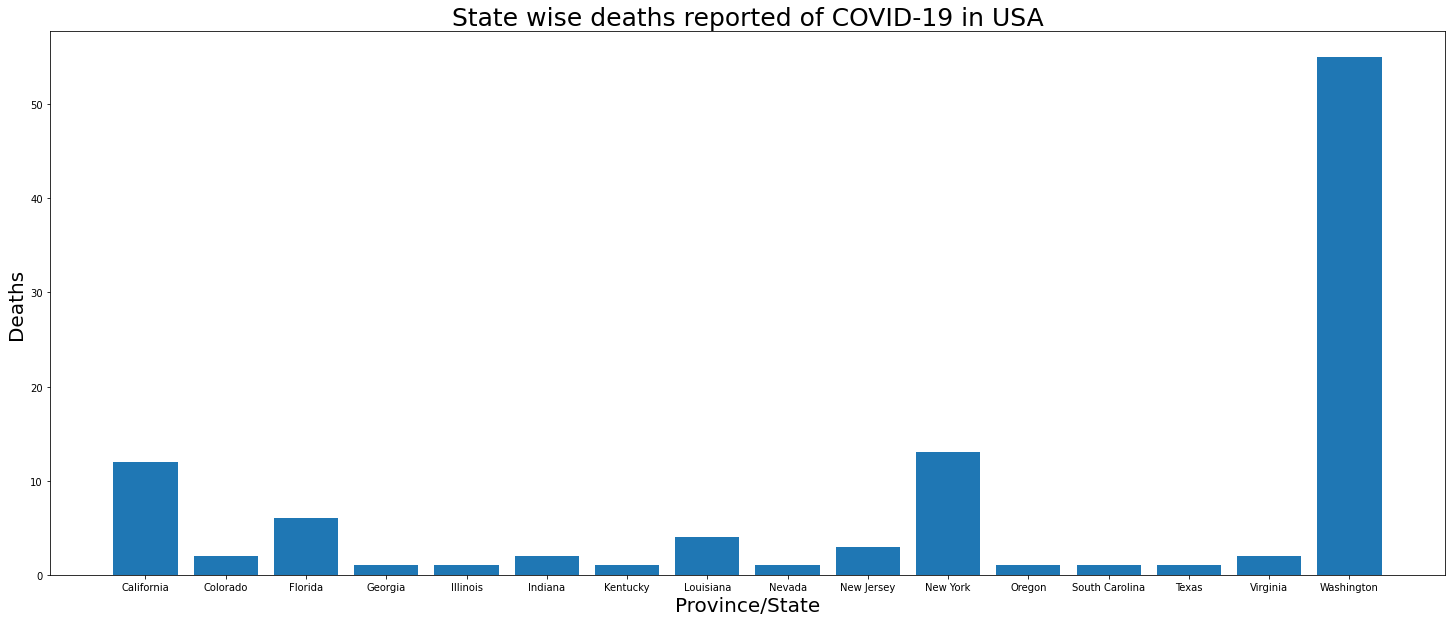

In [11]:
us_data=covid_data[covid_data['Country/Region']=='US']
result=us_data[(us_data.sum(axis=1)>0)&(us_data['Deaths'] > 0)].groupby(['Province/State'])['Deaths'].sum().reset_index()
result
plt.figure(figsize=(25, 10))
plt.bar(result['Province/State'],result['Deaths'])
plt.title('State wise deaths reported of COVID-19 in USA',fontsize=25)
plt.xlabel('Province/State',fontsize=20)
plt.ylabel('Deaths',fontsize=20)
plt.show()
               

# Question No: 12
          Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA.

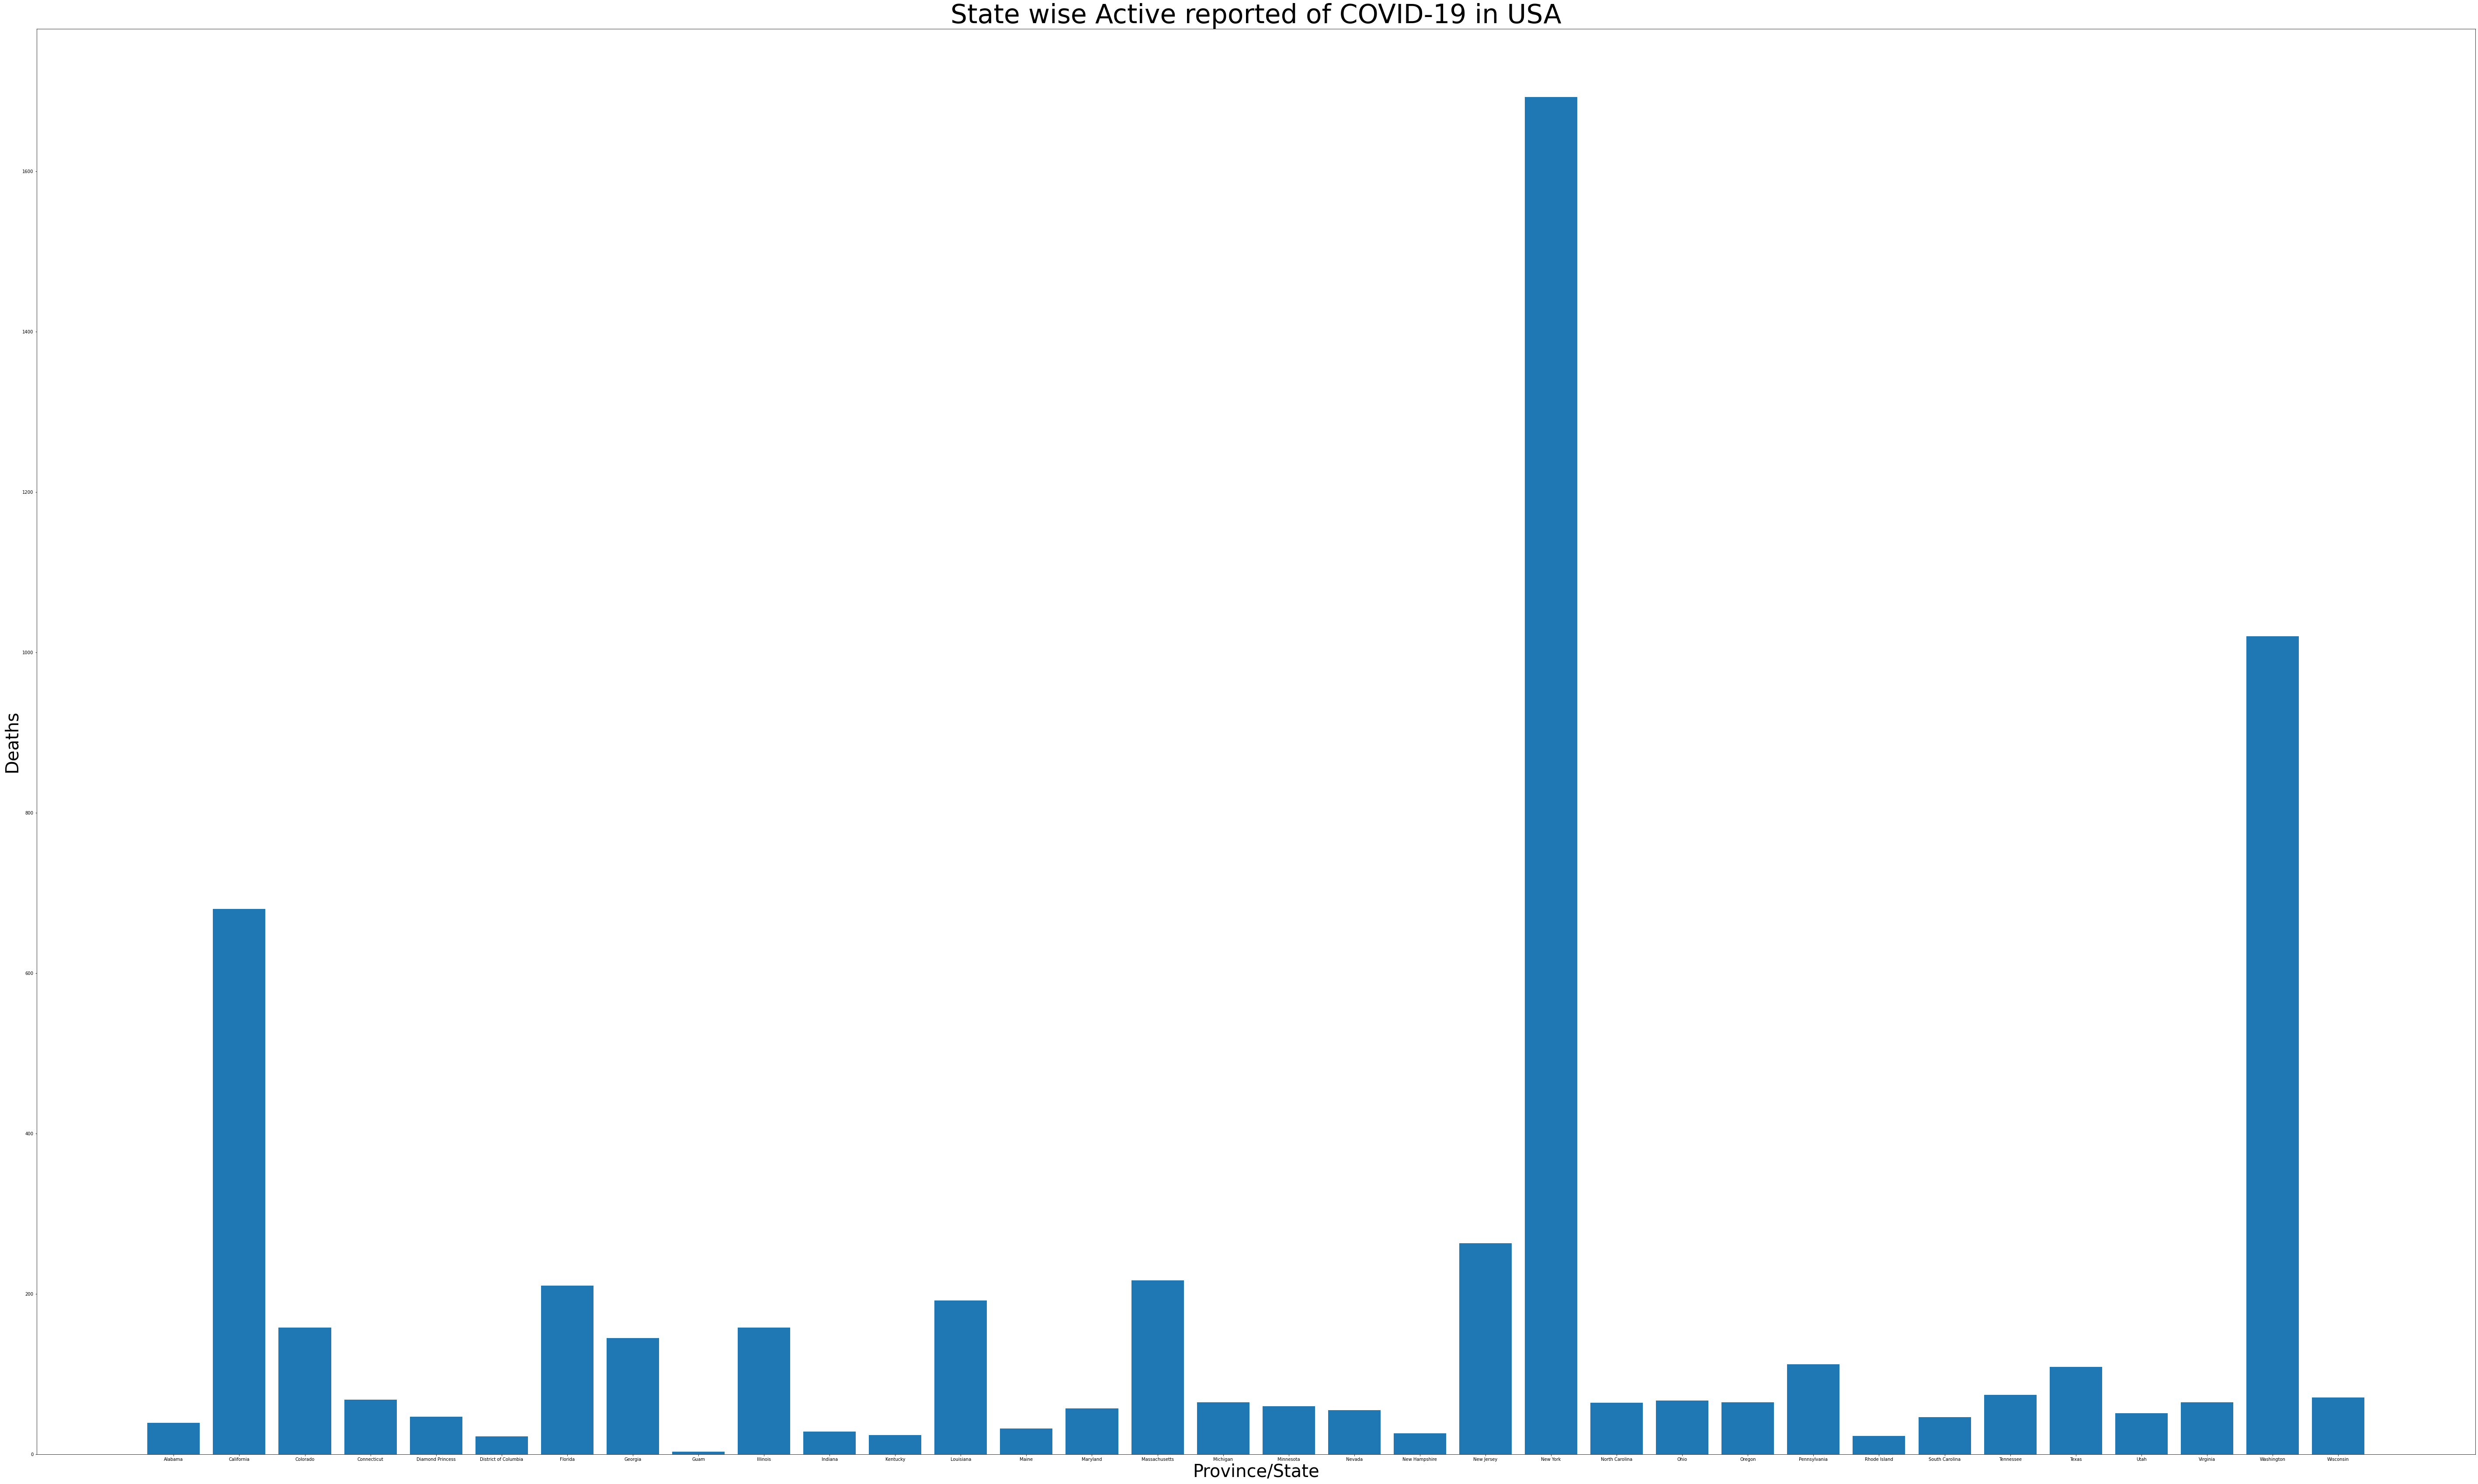

In [12]:
us_data=covid_data[covid_data['Country/Region']=='US']
result=us_data[(us_data.sum(axis=1)>0)&(us_data['Active'] > 0)].groupby(['Province/State'])['Active'].sum().reset_index()
result
plt.figure(figsize=(100, 60))
plt.bar(result['Province/State'],result['Active'])
plt.title('State wise Active reported of COVID-19 in USA',fontsize=60)
plt.xlabel('Province/State',fontsize=40)
plt.ylabel('Deaths',fontsize=40)
plt.show()

# Question No: 13
        Write a Python program to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA.

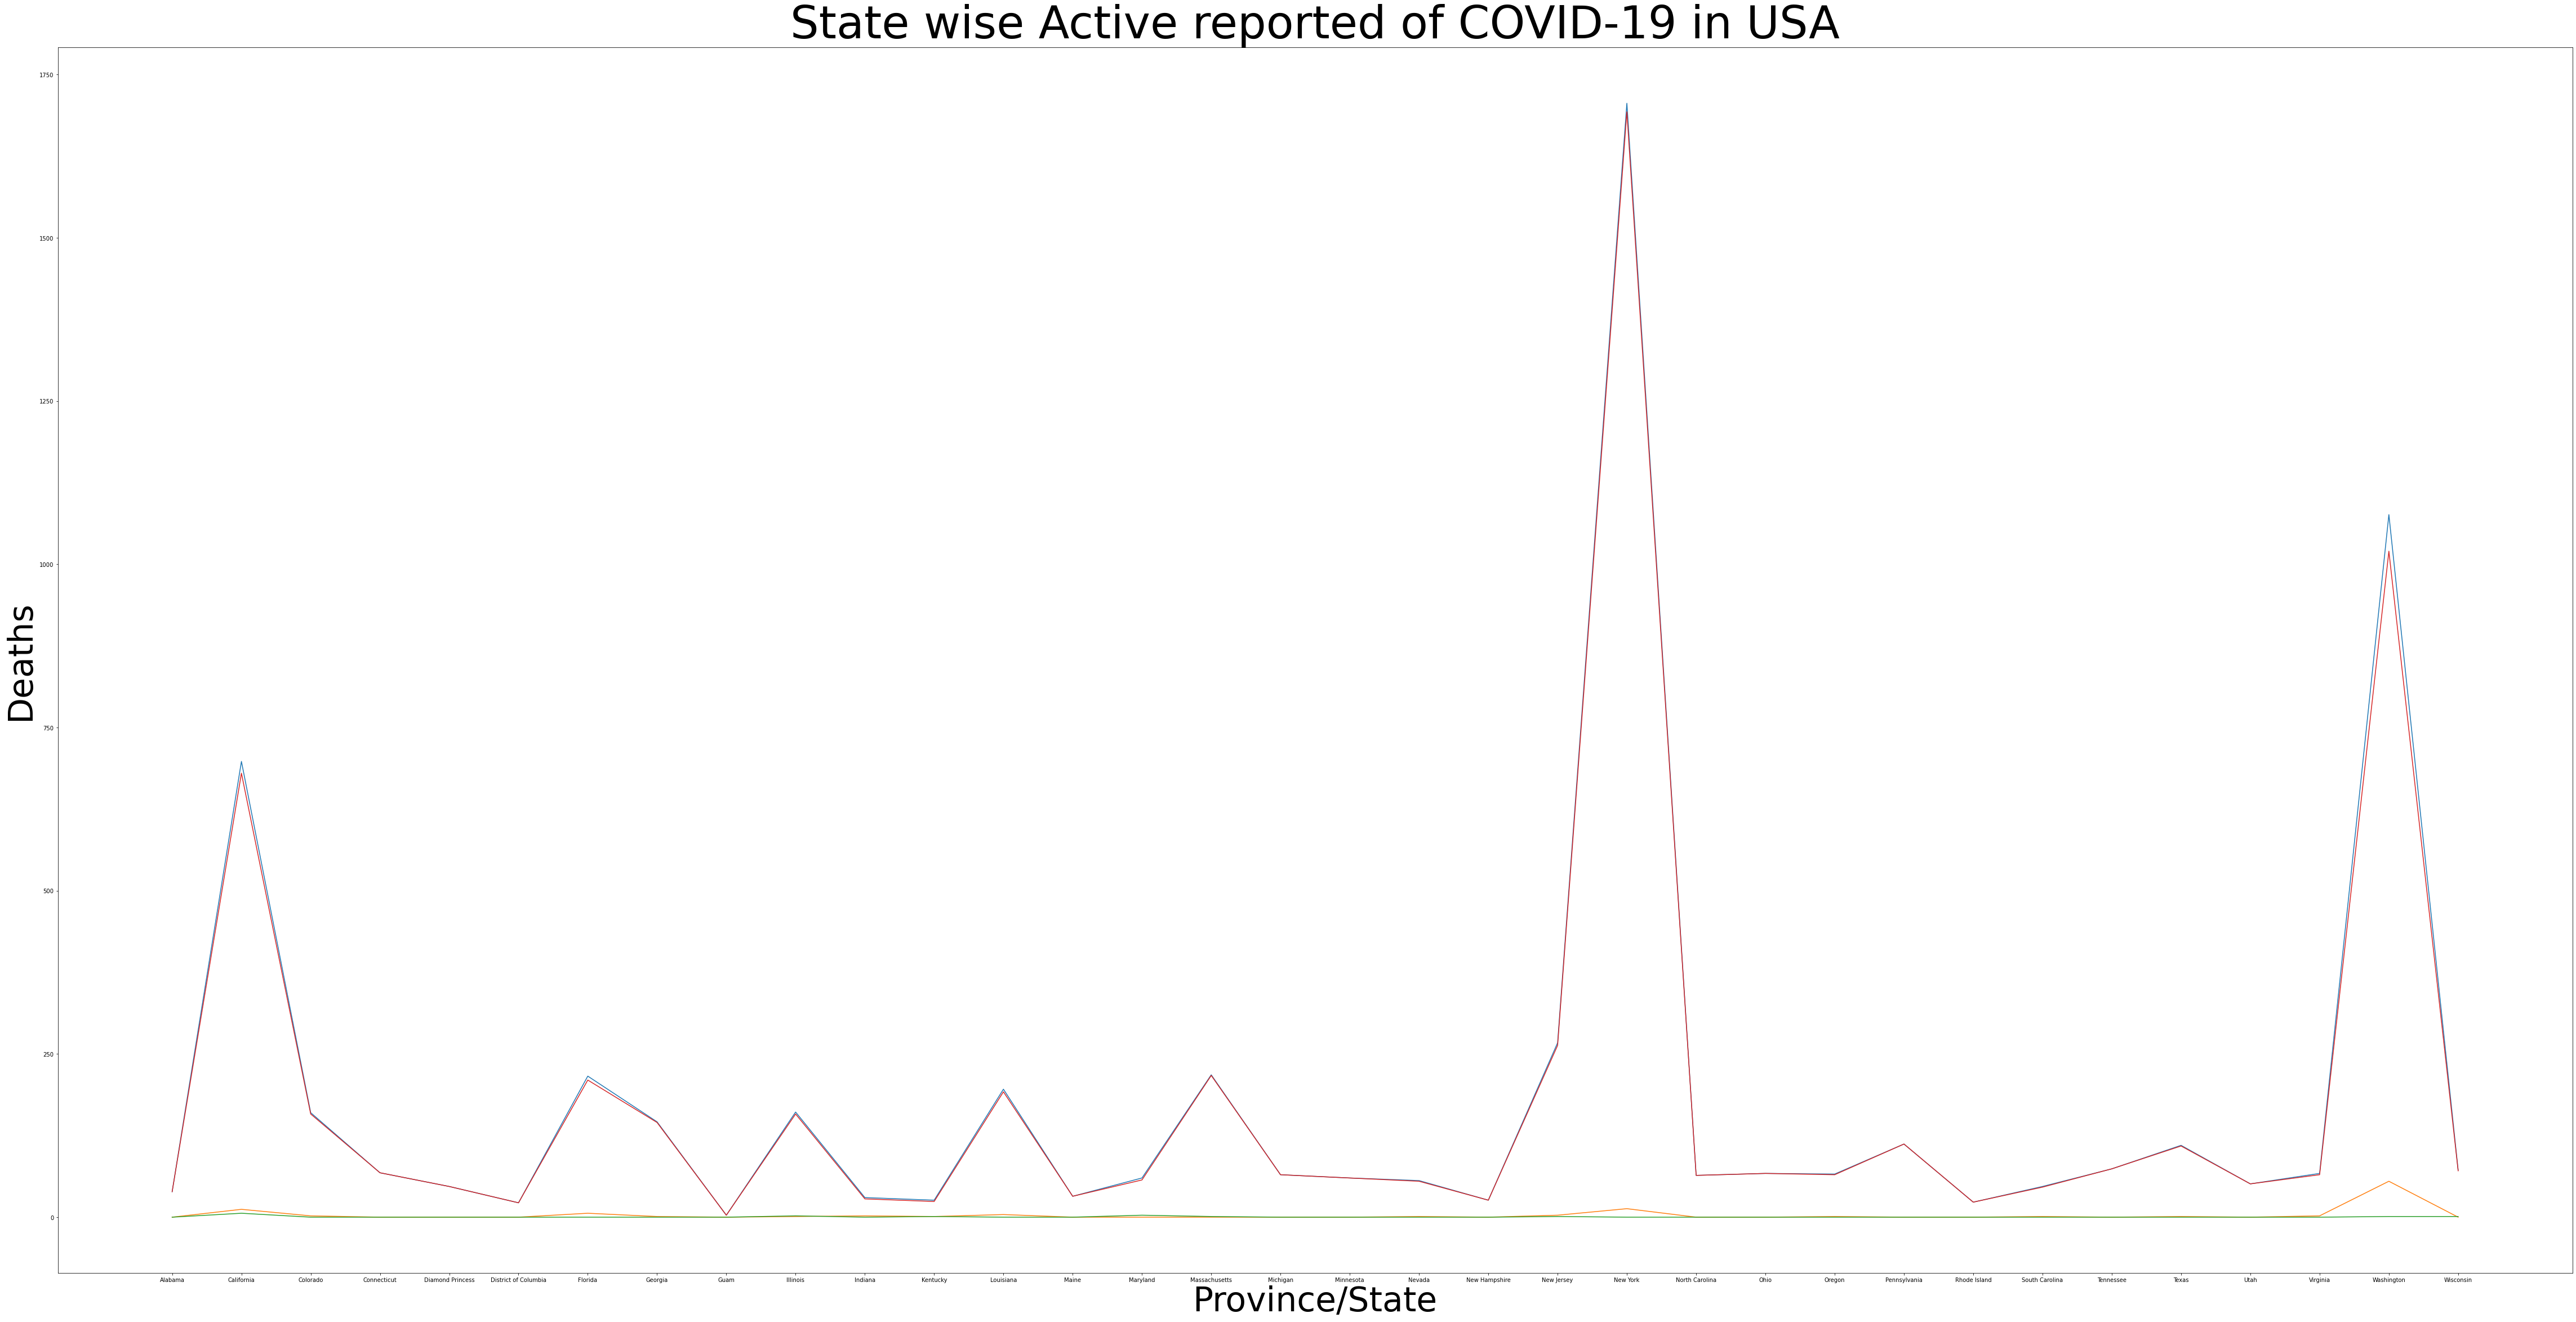

In [23]:
us_data=covid_data[covid_data['Country/Region']=='US']
result=us_data[us_data.sum(axis=1)>0].groupby(['Province/State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
result
plt.figure(figsize=(80, 40))
plt.plot(result['Province/State'], result[['Confirmed','Deaths', 'Recovered', 'Active']])
plt.title('State wise Active reported of COVID-19 in USA',fontsize=80)
plt.xlabel('Province/State',fontsize=60)
plt.ylabel('Deaths',fontsize=60)
plt.show()